

---


*Zeal Education Society's*

ZEAL COLLEGE OF ENGINEERING AND RESEARCH, PUNE

DEPT. OF COMPUTER ENGINEERING (**DATA SCIENCE**)

A. Y. **2023-24** Sem **IV**


---





# Details
---


Name- **Aditya Ravindra Bhamre**

PRN No- **77200082E**

Project- **Detection of Cyberbullying on Social Media** *(using BiLSTM)*

Guide- **Prof. Aparna Mote**


---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/bullying_dataset/kaggle_parsed_dataset.csv")

# Preprocessing the text data
X = data['Text']
y = data['oh_label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

# Encoding the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Displaying a few lines of the dataset
print("Sample of the dataset:")
print(data.head())

Sample of the dataset:
   index  oh_label             Date  \
0      0         1  20120618192155Z   
1      1         0  20120528192215Z   
2      2         0              NaN   
3      3         0              NaN   
4      4         0  20120619094753Z   

                                                Text  
0                               "You fuck your dad."  
1  "i really don't understand your point.\xa0 It ...  
2  "A\\xc2\\xa0majority of Canadians can and has ...  
3  "listen if you dont wanna get married to a man...  
4  "C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...  


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Build the BiLSTM model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test_encoded))

Epoch 1/10
220/220 [==============================] - 32s 128ms/step - loss: 0.5426 - accuracy: 0.7318 - val_loss: 0.4593 - val_accuracy: 0.7960
Epoch 2/10
220/220 [==============================] - 28s 129ms/step - loss: 0.4088 - accuracy: 0.8165 - val_loss: 0.4286 - val_accuracy: 0.8102
Epoch 3/10
220/220 [==============================] - 27s 124ms/step - loss: 0.3716 - accuracy: 0.8345 - val_loss: 0.4293 - val_accuracy: 0.8062
Epoch 4/10
220/220 [==============================] - 26s 119ms/step - loss: 0.3530 - accuracy: 0.8449 - val_loss: 0.4296 - val_accuracy: 0.8057
Epoch 5/10
220/220 [==============================] - 26s 118ms/step - loss: 0.3390 - accuracy: 0.8515 - val_loss: 0.4456 - val_accuracy: 0.8119
Epoch 6/10
220/220 [==============================] - 25s 112ms/step - loss: 0.3279 - accuracy: 0.8613 - val_loss: 0.4604 - val_accuracy: 0.7915
Epoch 7/10
220/220 [==============================] - 27s 121ms/step - loss: 0.3190 - accuracy: 0.8616 - val_loss: 0.4617 - val_ac

In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize classifiers
classifiers = {
    'Bagging Classifier': BaggingClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Linear SVC': LinearSVC(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'SVM': SVC()
}

# Train and evaluate classifiers
results = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Training Time (s)': []}
for clf_name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train_pad, y_train_encoded)
    train_time = time.time() - start_time
    y_pred = clf.predict(X_test_pad)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    results['Classifier'].append(clf_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['Training Time (s)'].append(train_time)

# Display the results
results_df = pd.DataFrame(results)
print(results_df.to_markdown(index=False))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


| Classifier               |   Accuracy |   Precision |     Recall |   F1 Score |   Training Time (s) |
|:-------------------------|-----------:|------------:|-----------:|-----------:|--------------------:|
| Bagging Classifier       |   0.690341 |    0.580786 | 0.228522   |  0.32799   |          1.71645    |
| Random Forest Classifier |   0.695455 |    0.77381  | 0.111684   |  0.195195  |          3.18581    |
| AdaBoost Classifier      |   0.668182 |    0.482759 | 0.04811    |  0.0875    |          1.32823    |
| SGD Classifier           |   0.601136 |    0.359155 | 0.262887   |  0.303571  |          0.290811   |
| Logistic Regression      |   0.665341 |    0.315789 | 0.0103093  |  0.0199667 |          0.157408   |
| Decision Tree Classifier |   0.600568 |    0.39292  | 0.381443   |  0.387097  |          0.298617   |
| Linear SVC               |   0.581818 |    0.339583 | 0.280069   |  0.306968  |          1.08472    |
| Multinomial Naive Bayes  |   0.416477 |    0.350168 | 0.893471

                 Classifier  Accuracy  Precision    Recall  F1 Score  \
0        Bagging Classifier  0.690341   0.580786  0.228522  0.327990   
1  Random Forest Classifier  0.695455   0.773810  0.111684  0.195195   
2       AdaBoost Classifier  0.668182   0.482759  0.048110  0.087500   
3            SGD Classifier  0.601136   0.359155  0.262887  0.303571   
4       Logistic Regression  0.665341   0.315789  0.010309  0.019967   
5  Decision Tree Classifier  0.600568   0.392920  0.381443  0.387097   
6                Linear SVC  0.581818   0.339583  0.280069  0.306968   
7   Multinomial Naive Bayes  0.416477   0.350168  0.893471  0.503145   
8    K Neighbors Classifier  0.625000   0.386628  0.228522  0.287257   
9                       SVM  0.672159   1.000000  0.008591  0.017036   

   Training Time (s)  
0           1.716449  
1           3.185812  
2           1.328228  
3           0.290811  
4           0.157408  
5           0.298617  
6           1.084716  
7           0.010766  


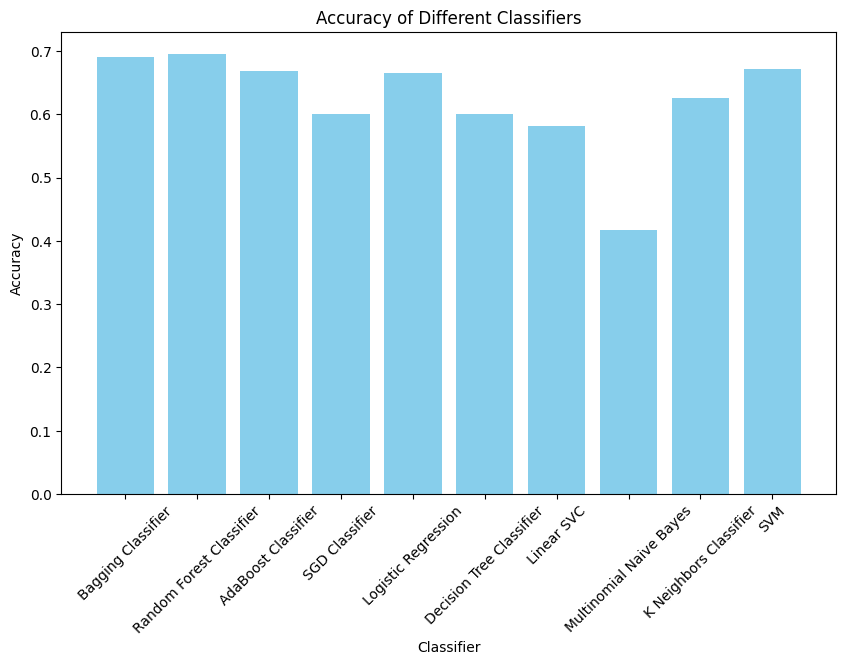

In [ ]:
import matplotlib.pyplot as plt

# Tabulate the results
print(results_df)

# Visualize the accuracy of different classifiers
plt.figure(figsize=(10, 6))
plt.bar(results_df['Classifier'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45)
plt.show()

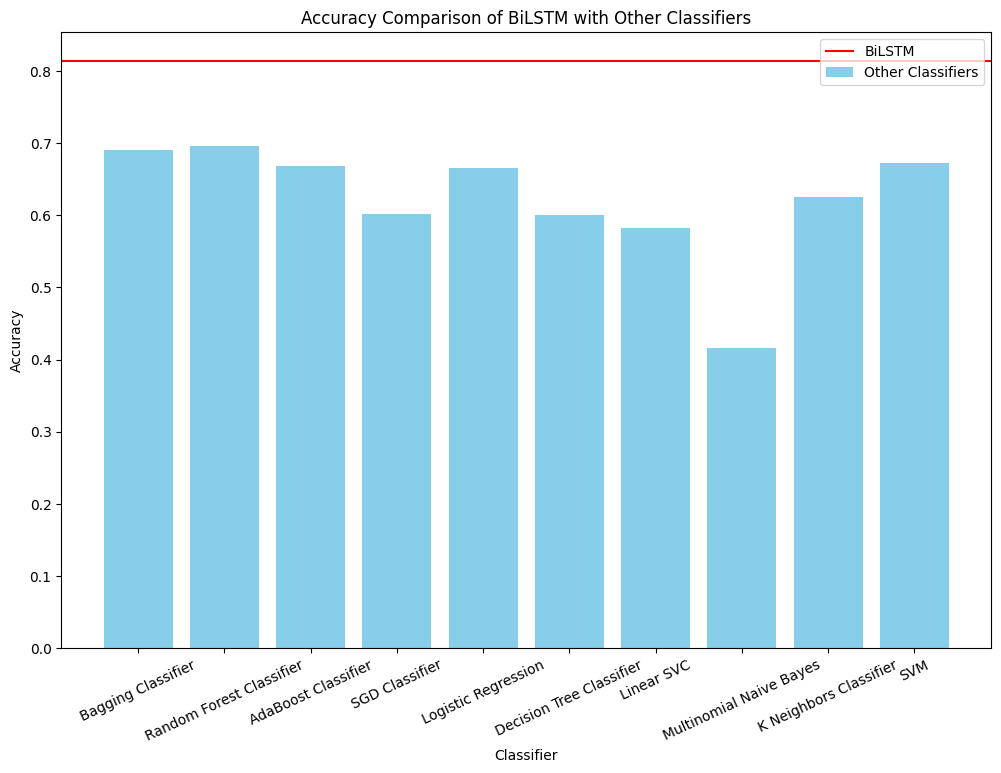

In [ ]:
# Visualize the accuracy of BiLSTM model compared to other classifiers
plt.figure(figsize=(12, 8))
plt.bar(results_df['Classifier'], results_df['Accuracy'], color='skyblue', label='Other Classifiers')
plt.axhline(y=max(history.history['val_accuracy']), color='r', linestyle='-', label='BiLSTM')  # Plotting BiLSTM accuracy
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of BiLSTM with Other Classifiers')
plt.xticks(rotation=25)
plt.legend()
plt.show()


In [ ]:
# Interpretation
print("Maximum BiLSTM validation accuracy:", max(history.history['val_accuracy']))
print("Average accuracy of other classifiers:", results_df['Accuracy'].mean())


Maximum BiLSTM validation accuracy: 0.8130682110786438
Average accuracy of other classifiers: 0.6216477272727273


In [ ]:
# Import necessary libraries
from tensorflow.keras.callbacks import EarlyStopping

# Define the BiLSTM model with improved parameters
improved_model = Sequential()
improved_model.add(Embedding(max_words, 128, input_length=maxlen))  # Increased embedding size
improved_model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))  # Added dropout
improved_model.add(Dense(1, activation='sigmoid'))

# Compile the improved model
improved_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Train the improved model
improved_history = improved_model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=32,
                                      validation_data=(X_test_pad, y_test_encoded),
                                      callbacks=[early_stopping])

# Compare the old and improved accuracy
old_accuracy = max(history.history['val_accuracy'])
improved_accuracy = max(improved_history.history['val_accuracy'])

print("Old BiLSTM accuracy:", old_accuracy)
print("Improved BiLSTM accuracy:", improved_accuracy)


Epoch 1/10
220/220 [==============================] - 166s 697ms/step - loss: 0.5467 - accuracy: 0.7383 - val_loss: 0.4517 - val_accuracy: 0.7915
Epoch 2/10
220/220 [==============================] - 145s 658ms/step - loss: 0.4134 - accuracy: 0.8138 - val_loss: 0.4279 - val_accuracy: 0.8227
Epoch 3/10
220/220 [==============================] - 145s 657ms/step - loss: 0.3817 - accuracy: 0.8342 - val_loss: 0.4295 - val_accuracy: 0.8182
Epoch 4/10
220/220 [==============================] - 144s 653ms/step - loss: 0.3623 - accuracy: 0.8434 - val_loss: 0.4302 - val_accuracy: 0.8142
Old BiLSTM accuracy: 0.8130682110786438
Improved BiLSTM accuracy: 0.8227272629737854


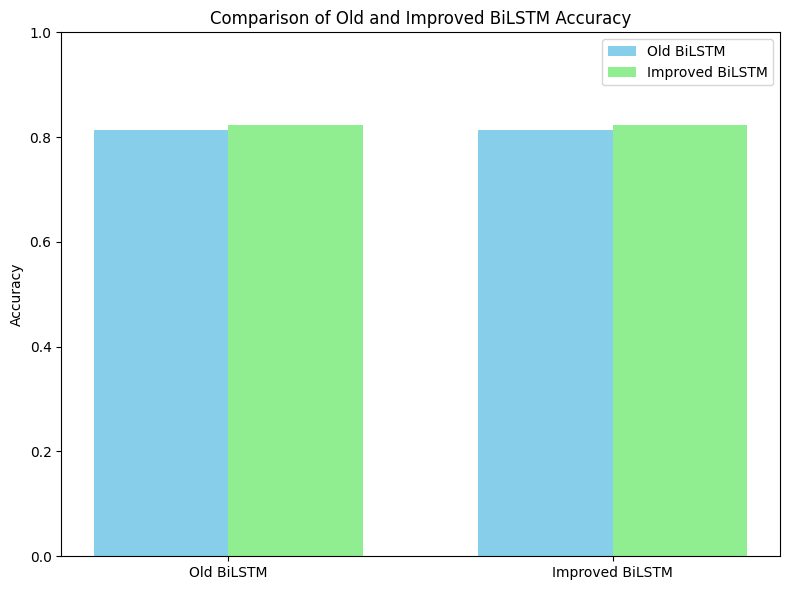

In [ ]:
# Visualize the comparison
labels = ['Old BiLSTM', 'Improved BiLSTM']
old_accuracies = [old_accuracy]
improved_accuracies = [improved_accuracy]

x = range(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35

bar1 = ax.bar(x, old_accuracies, bar_width, label='Old BiLSTM', color='skyblue')
bar2 = ax.bar([i + bar_width for i in x], improved_accuracies, bar_width, label='Improved BiLSTM', color='lightgreen')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Old and Improved BiLSTM Accuracy')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

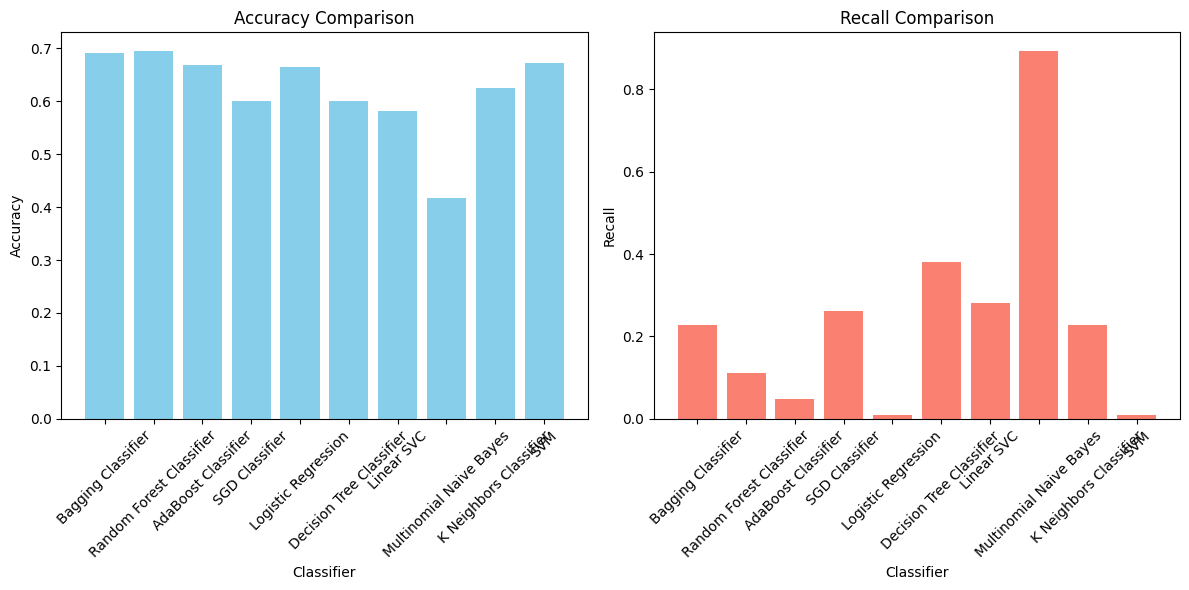

In [ ]:
# Remove non-numeric values from 'Recall' column
results_df['Recall'] = pd.to_numeric(results_df['Recall'], errors='coerce')

# Visualize the metrics
plt.figure(figsize=(12, 6))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.bar(results_df['Classifier'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(1, 2, 2)
plt.bar(results_df['Classifier'], results_df['Recall'], color='salmon')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Convert 'Precision', 'Recall', and 'F1 Score' columns to numeric, replacing non-numeric values with NaN
results_df['Precision'] = pd.to_numeric(results_df['Precision'], errors='coerce')
results_df['Recall'] = pd.to_numeric(results_df['Recall'], errors='coerce')
results_df['F1 Score'] = pd.to_numeric(results_df['F1 Score'], errors='coerce')

# Print the tabulated results
print(results_df)

                 Classifier  Accuracy  Precision    Recall  F1 Score  \
0        Bagging Classifier  0.690341   0.580786  0.228522  0.327990   
1  Random Forest Classifier  0.695455   0.773810  0.111684  0.195195   
2       AdaBoost Classifier  0.668182   0.482759  0.048110  0.087500   
3            SGD Classifier  0.601136   0.359155  0.262887  0.303571   
4       Logistic Regression  0.665341   0.315789  0.010309  0.019967   
5  Decision Tree Classifier  0.600568   0.392920  0.381443  0.387097   
6                Linear SVC  0.581818   0.339583  0.280069  0.306968   
7   Multinomial Naive Bayes  0.416477   0.350168  0.893471  0.503145   
8    K Neighbors Classifier  0.625000   0.386628  0.228522  0.287257   
9                       SVM  0.672159   1.000000  0.008591  0.017036   

   Training Time (s)  
0           1.716449  
1           3.185812  
2           1.328228  
3           0.290811  
4           0.157408  
5           0.298617  
6           1.084716  
7           0.010766  


In [ ]:
from tabulate import tabulate

# Create a DataFrame for BiLSTM metrics
bilstm_metrics = pd.DataFrame({
    'Classifier': ['BiLSTM'],
    'Accuracy': [max(history.history['val_accuracy'])],
    'Precision': ['-'],
    'Recall': ['-'],
    'F1 Score': ['-'],
    'Training Time': [sum(history.epoch)]
})

# Concatenate BiLSTM metrics with the existing results DataFrame
results_df = pd.concat([results_df, bilstm_metrics], ignore_index=True)

# Convert 'Precision', 'Recall', and 'F1 Score' columns to numeric, replacing non-numeric values with NaN
results_df['Precision'] = pd.to_numeric(results_df['Precision'], errors='coerce')
results_df['Recall'] = pd.to_numeric(results_df['Recall'], errors='coerce')
results_df['F1 Score'] = pd.to_numeric(results_df['F1 Score'], errors='coerce')

# Print the tabulated results with a modern look
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+----+--------------------------+---------------------+---------------------+----------------------+----------------------+-----------------------+---------------+
|    |        Classifier        |      Accuracy       |      Precision      |        Recall        |       F1 Score       |   Training Time (s)   | Training Time |
+----+--------------------------+---------------------+---------------------+----------------------+----------------------+-----------------------+---------------+
| 0  |    Bagging Classifier    | 0.6903409090909091  | 0.5807860262008734  | 0.22852233676975944  |  0.3279901356350185  |  1.7164487838745117   |      nan      |
| 1  | Random Forest Classifier | 0.6954545454545454  | 0.7738095238095238  | 0.11168384879725086  |  0.1951951951951952  |  3.1858115196228027   |      nan      |
| 2  |   AdaBoost Classifier    | 0.6681818181818182  | 0.4827586206896552  | 0.048109965635738834 | 0.08750000000000001  |   1.328228235244751   |      nan      |
| 3  |      SGD 

In [ ]:
def predict_bullying(text, model, tokenizer, maxlen):
    # Preprocess the input text
    text_sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(text_sequence, maxlen=maxlen, padding='post')

    # Make predictions
    prediction = model.predict(padded_sequence)[0][0]

    # Determine the percentage confidence
    percentage_confidence = prediction * 100

    return percentage_confidence

# Example usage:
text = input("Enter the text to analyze: ")

# Call the predict_bullying function
confidence = predict_bullying(text, model, tokenizer, maxlen)

# Print the result
print(f"The text is {confidence:.2f}% likely to be bullying.")


NameError: name 'model' is not defined